In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
import sys
from typing import Tuple

#### Load data

In [2]:
df = pd.read_csv('Salary.csv')
df

,YearsExperience,Age,Salary
0,1.1,20,39343
1,1.3,21,46205
2,1.5,21,37731
3,2.0,22,43525
4,2.2,22,39891
5,2.9,22,56642
6,3.0,23,60150
7,3.2,24,54445
8,3.2,24,62444
9,3.7,24,57189


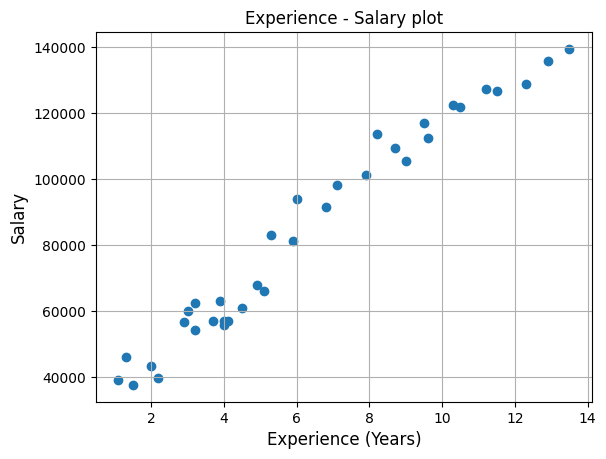

In [3]:
plt.scatter(df['YearsExperience'], df['Salary'])

plt.title("Experience - Salary plot")
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.grid(True)

plt.show()

#### Linear regression model

In [4]:
def initialize_coefficients() -> Tuple[float, float, float]:
    epsilon = sys.float_info.epsilon
    return random.uniform(epsilon, 1 - epsilon), random.uniform(epsilon, 1 - epsilon), 0.001

In [5]:
def calculate_regression_function(x: np.ndarray, beta0: float, beta1: float) -> np.ndarray:
    return beta0 + beta1 * x

In [6]:
def calculate_error(predictions: np.ndarray, y: np.ndarray, beta0: float, beta1: float) -> float:
    return np.sum(np.square(calculate_regression_function(predictions, beta0, beta1) - y)) / (2 * len(y))

In [7]:
def calculate_gradient(predictions: np.ndarray, y: np.ndarray, beta0: float, beta1: float) -> Tuple[float, float]:
    m = len(y)
    diff = calculate_regression_function(predictions, beta0, beta1) - y
    return np.sum(diff) / m, np.sum(diff * predictions) / m

In [8]:
def update_regression_coefficients(x: np.ndarray, y: np.ndarray, beta0: float, beta1: float, alpha: float) -> Tuple[float, float]:
    ssr_beta0, ssr_beta1 = calculate_gradient(x, y, beta0, beta1)
    return beta0 - alpha * ssr_beta0, beta1 - alpha * ssr_beta1

In [9]:
EPOCHS = 100

def learn_and_fit(x: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    b0, b1, error = np.empty(EPOCHS), np.empty(EPOCHS), np.empty(EPOCHS)
    beta0, beta1, alpha = initialize_coefficients()

    for epoch in range(EPOCHS):
        beta0, beta1 = update_regression_coefficients(x, y, beta0, beta1, alpha)
        
        b0[epoch] = beta0
        b1[epoch] = beta1
        error[epoch] = calculate_error(x, y, beta0, beta1)
        
    return b0, b1, error

#### Learning model

In [10]:
years_experience = df['YearsExperience'].values
salary = df['Salary'].values / 100000.0

b0, b1, error = learn_and_fit(years_experience, salary)

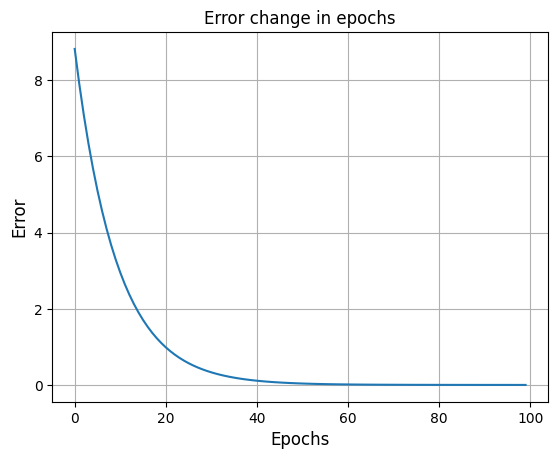

In [11]:
plt.plot(np.arange(EPOCHS), error)

plt.title("Error change in epochs")
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.grid(True)

plt.show()

#### Results

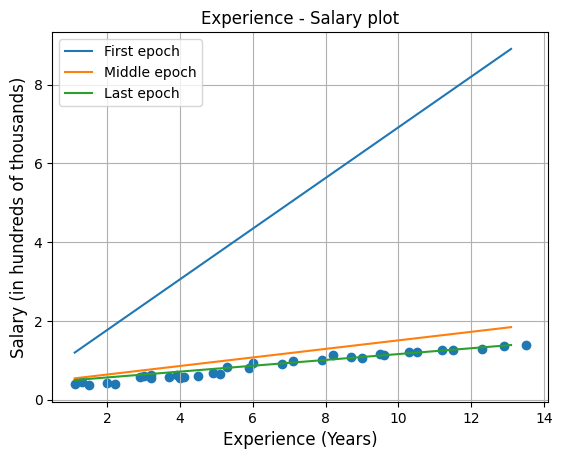

In [12]:
plt.scatter(years_experience, salary)

x = np.arange(min(years_experience), max(years_experience))
plt.plot(x, b0[0] + x * b1[0], label="First epoch")
plt.plot(x, b0[EPOCHS // 2] + x * b1[EPOCHS // 2], label="Middle epoch")
plt.plot(x, b0[-1] + x * b1[-1], label="Last epoch")

plt.title("Experience - Salary plot")
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary (in hundreds of thousands)', fontsize=12)
plt.grid(True)

plt.legend()

plt.show()

#### Learning rate

In [13]:
alphas = [0.01, 0.001, 0.0001]
epsilon = 0.005

for alpha in alphas:
    epochs = 0
    beta0, beta1 = initialize_coefficients()[0:2]
    
    while calculate_error(years_experience, salary, beta0, beta1) > epsilon:
        beta0, beta1 = update_regression_coefficients(years_experience, salary, beta0, beta1, alpha)
        epochs += 1
        
    print(f'Alpha = {alpha}, Number of epochs = {epochs}')

Alpha = 0.01, Number of epochs = 205
Alpha = 0.001, Number of epochs = 60
Alpha = 0.0001, Number of epochs = 40486


#### Unit tests

In [14]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
        
        b0, b1, error = learn_and_fit(x, y)
        
        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [15]:
class SimpleCoefficientsTest(unittest.TestCase):
    
    def test_initialisation(self):
        for _ in range(1000):
            beta0, beta1, alpha = initialize_coefficients()
            
            self.assertTrue(beta0 > 0.0)
            self.assertTrue(beta0 < 1.0)
            self.assertTrue(beta1 > 0.0)
            self.assertTrue(beta1 < 1.0)
            self.assertTrue(alpha > 0.0)
            self.assertTrue(alpha < 1.0)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_initialisation (__main__.SimpleCoefficientsTest.test_initialisation) ... ok
test_learn_and_fit (__main__.SimpleLinearRegressionTest.test_learn_and_fit) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK
